<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/LR_Vwagy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Linear Regression model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
#Load the Data
df=pd.read_csv('/content/VWAGY.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-07,21.221500,21.570000,21.209999,21.400000,20.717226,92400
1,2013-06-10,21.770000,21.850000,21.629999,21.760000,21.065741,112600
2,2013-06-11,21.150000,21.320000,21.045000,21.045000,20.373552,138000
3,2013-06-12,20.775000,20.844999,20.540001,20.545000,19.889505,113600
4,2013-06-13,20.450001,20.745001,20.299999,20.745001,20.083126,76400
...,...,...,...,...,...,...,...
2008,2021-05-28,36.084999,36.599998,35.939999,36.165001,36.165001,837300
2009,2021-06-01,36.299000,36.740002,36.270000,36.669998,36.669998,603900
2010,2021-06-02,37.736000,37.973999,37.500000,37.720001,37.720001,628800
2011,2021-06-03,37.410000,37.599998,36.360001,37.500000,37.500000,620700


In [ ]:
df.shape

(2013, 7)

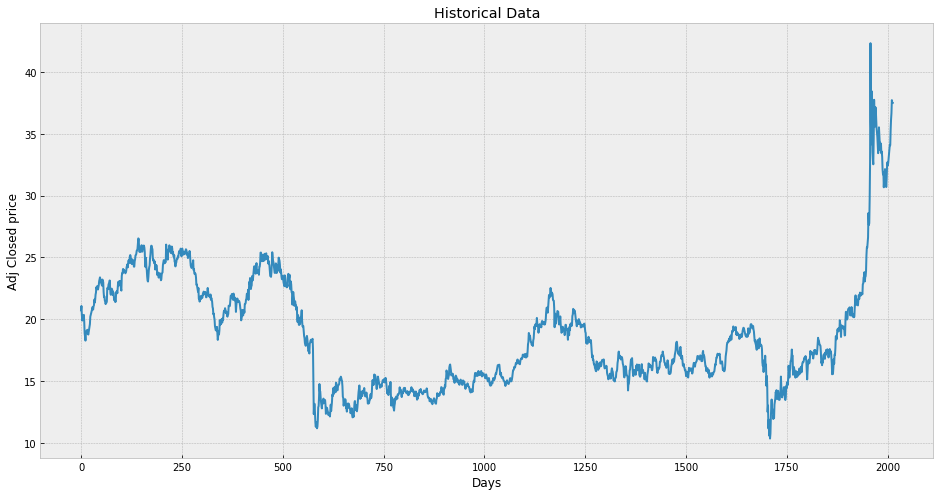

In [ ]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Historical Data')
plt.xlabel('Days')
plt.ylabel('Adj Closed price')
plt.plot(df['Adj Close'])
plt.show()

In [ ]:
df=df[['Adj Close']]
df

,Adj Close
0,20.717226
1,21.065741
2,20.373552
3,19.889505
4,20.083126
...,...
2008,36.165001
2009,36.669998
2010,37.720001
2011,37.500000


In [ ]:
#Create a variable to create 'x days out in the future
future_days=30
#Create a new column shifted x units
df['Prediction']=df[['Adj Close']].shift(-future_days)
df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Adj Close,Prediction
0,20.717226,20.770472
1,21.065741,21.033792
2,20.373552,21.118986
3,19.889505,21.578833
4,20.083126,21.336809
...,...,...
2008,36.165001,NaN
2009,36.669998,NaN
2010,37.720001,NaN
2011,37.500000,NaN


In [ ]:
#Create the feature data set(X) and covert to it to a numpy array and remove last x days.
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[20.717226]
 [21.065741]
 [20.373552]
 ...
 [34.240002]
 [34.279999]
 [33.639999]]


In [ ]:
#Create the target data st
y=np.array(df['Prediction'])[:-future_days]
print(y)

[20.770472 21.033792 21.118986 ... 37.720001 37.5      37.494999]


In [ ]:
#Split data in 75% train and 25% test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
#create the models
#create the linear Regressor model
lr=LinearRegression().fit(x_train,y_train)

In [ ]:
#get the last x rows of feature dataset
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future


array([[27.620001],
       [27.77    ],
       [29.76    ],
       [32.75    ],
       [42.330002],
       [35.950001],
       [34.150002],
       [38.439999],
       [36.189999],
       [33.490002],
       [32.869999],
       [32.529999],
       [34.650002],
       [37.75    ],
       [36.299999],
       [35.580002],
       [37.154999],
       [37.099998],
       [36.285   ],
       [35.5     ],
       [35.075001],
       [34.759998],
       [34.099998],
       [33.43    ],
       [33.939999],
       [35.52    ],
       [34.865002],
       [34.240002],
       [34.279999],
       [33.639999]])

In [ ]:
#Show the model linear regression  prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)
print()


[27.13659242 27.27593682 29.12458485 31.90220173 40.80172525 34.87490301
 33.20275999 37.18803361 35.09785368 32.58964055 32.01367707 31.69782766
 33.66724442 36.54704602 35.20004025 34.53118546 35.99430862 35.94321441
 35.18610665 34.45686609 34.06205526 33.76942728 33.15630783 32.53390056
 33.00767375 34.47544547 33.86697273 33.28636719 33.32352316 32.72898309]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


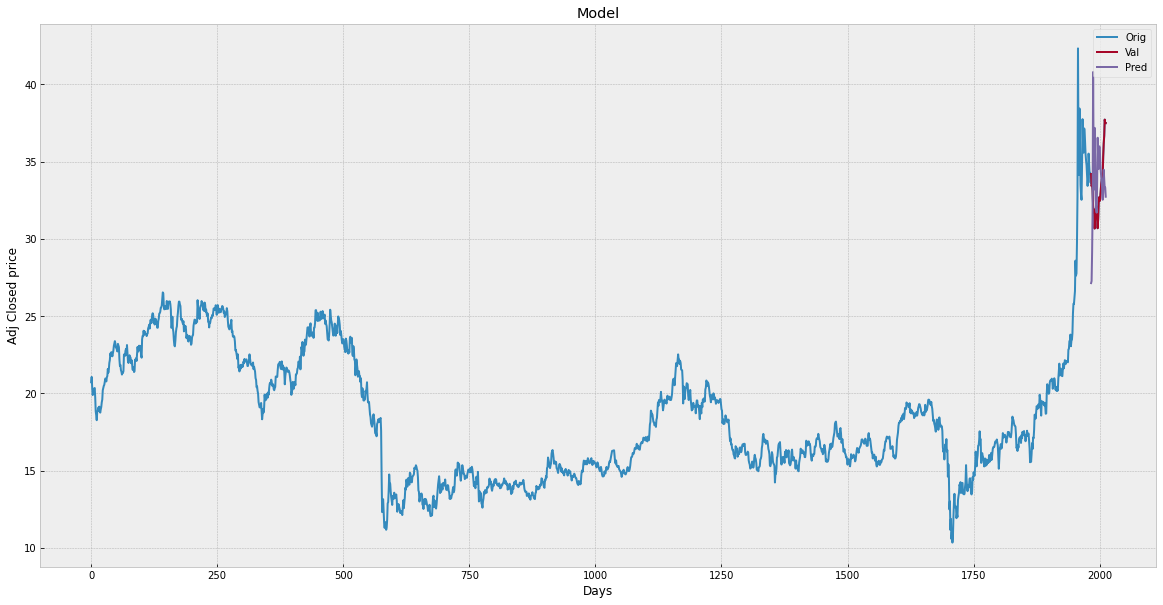

In [ ]:
#Visulaize
predictions=lr_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Closed price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()